In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import symbols, log, Eq, summation
from IPython.display import display
from scipy.linalg import solve

In [14]:
pi = symbols('pi', positive=True)
rho, d0 = symbols('rho d0')

def f0(pi):
    return pi * log(1 / pi, 2)

def g0(pi, rho, d0):
    return rho * pi - d0

def g1(pi):
    return pi - 1

def grad_f0(pi):
    return log(1 / pi, 2) + 1
n=symbols('n')
pi_sym = symbols('pi', positive=True)
f0_expr = f0(pi_sym)
g0_expr = g0(pi_sym, symbols('rho'), symbols('d0'))
g1_expr = g1(pi_sym)
grad_f0_expr = grad_f0(pi_sym)

sum_f0 = summation(f0_expr, (pi, 1, n))
sum_g0 = summation(g0_expr, (pi, 1, n))
sum_g1 = summation(g1_expr, (pi, 1, n))
sum_grad_f0 = summation(grad_f0_expr, (pi, 1, n))


display(Eq(symbols('f0'), sum_f0))


Eq(f0, Sum(pi*log(1/pi)/log(2), (pi, 1, n)))

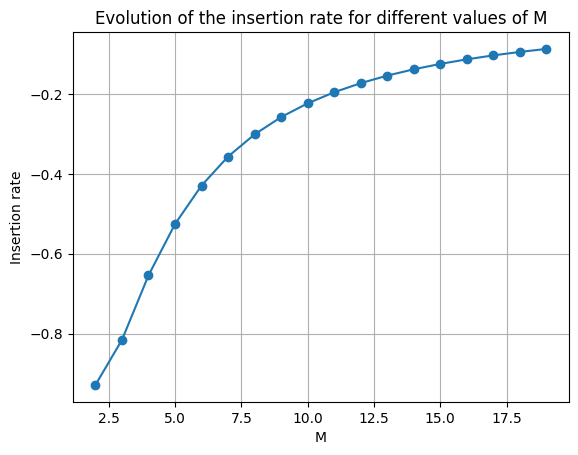

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f0(pi):
    return np.sum(pi * np.log2(1 / pi))

def g0(pi, rho, d0):
    return np.sum(rho * pi) - d0

def g1(pi):
    return np.sum(pi) - 1

def grad_f0(pi):
    return np.log2(1 / pi) + 1

def proj_C(pi, rho, d0):
    pi = pi - (g1(pi) / len(pi))
    pi = np.maximum(pi, 0)
    if g0(pi, rho, d0) > 0:
        pi = pi - (g0(pi, rho, d0) / np.sum(rho))
        pi = np.maximum(pi, 0)
    return pi


def proj_grad(pi0, rho, d0, alpha, eps, max_iter):
    pi = pi0
    for i in range(max_iter):
        pi = proj_C(pi - alpha * grad_f0(pi), rho, d0)
        if np.linalg.norm(grad_f0(pi)) < eps:
            break
    return pi

d0 = 1 
alpha = 0.01 
eps = 1e-6
max_iter = 1000 


M_values = np.arange(2, 20)

pi_values = []
insertion_rates = []

for M in M_values:
    
    rho = np.arange(1, M + 1) ** 2
    pi0 = np.ones(M) / M
    pi = proj_grad(pi0, rho, d0, alpha, eps, max_iter)
    insertion_rate = -f0(pi)
    pi_values.append(pi)
    insertion_rates.append(insertion_rate)

plt.plot(M_values, insertion_rates, marker='o')
plt.xlabel('M')
plt.grid(True)
plt.ylabel('Insertion rate')
plt.title('Evolution of the insertion rate for different values of M')
plt.show()

In [16]:
#Méthode de Gradient Projeté

import numpy as np

# Définir la fonction objectif
def objective_function(pi):
    return -np.sum(pi * np.log2(pi))

# Définir la contrainte de distorsion
def distorsion_constraint(pi):
    return d(pi) - d0

# Fonction pour projeter sur la contrainte linéaire
def projection(pi):
    epsilon = 1e-10  # Petite constante pour éviter les divisions par zéro
    return (pi + epsilon) / np.sum(pi + epsilon)

# Calcul du gradient de la fonction objectif
def compute_gradient(pi):
    gradient = np.zeros_like(pi)
    for k in range(len(pi)):
        gradient[k] = -np.log2(pi[k]) - 1
    return gradient

# Algorithme de gradient projeté
def projected_gradient_descent(initial_permutation, learning_rate=0.01, iterations=1000):
    pi = initial_permutation.copy()

    for _ in range(iterations):
        gradient = compute_gradient(pi)
        pi = projection(pi - learning_rate * gradient)

    return pi

# Exemple d'utilisation
M = 10
d0 = 0.5

# Initialiser la permutation initiale
initial_permutation = np.ones(M) / M  # Initialisation uniforme

# Appliquer l'algorithme de gradient projeté
result_pi = projected_gradient_descent(initial_permutation)

# Afficher les résultats
print("Permutation optimale:", result_pi)
print("Valeur optimale de la fonction objectif:", objective_function(result_pi))


Permutation optimale: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Valeur optimale de la fonction objectif: 3.321928094887362


In [17]:
#Méthode de Barrière Intérieure

import numpy as np

# Définir une fonction fictive pour la distorsion (à remplacer par votre propre fonction)
def dummy_d(pi):
    return np.sum(pi**2)

# Définir la fonction objectif avec une fonction barrière
def objective_function(pi, t):
    return -np.sum(pi * np.log2(pi)) + t * distorsion_constraint(pi)

# Définir la contrainte de distorsion
def distorsion_constraint(pi):
    return dummy_d(pi) - d0  # Utilisation de dummy_d à la place de d

# Fonction pour projeter sur la contrainte linéaire
def projection(pi):
    epsilon = 1e-10  # Petite constante pour éviter les divisions par zéro
    return (pi + epsilon) / np.sum(pi + epsilon)

# Calcul du gradient de la fonction objectif
def compute_gradient(pi):
    gradient = np.zeros_like(pi)
    for k in range(len(pi)):
        gradient[k] = -np.log2(pi[k]) - 1
    return gradient

# Algorithme de barrière intérieure
def interior_point_method(initial_permutation, initial_t=1.0, mu=2.0, epsilon=1e-6, max_iterations=100):
    pi = initial_permutation.copy()
    t = initial_t

    for _ in range(max_iterations):
        pi = projection(pi - (1 / t) * compute_gradient(pi))
        t *= mu

        if distorsion_constraint(pi) < epsilon:
            break

    return pi

# Exemple d'utilisation
M = 10
d0 = 0.5

# Initialiser la permutation initiale
initial_permutation = np.ones(M) / M  # Initialisation uniforme

# Appliquer l'algorithme de barrière intérieure
result_pi = interior_point_method(initial_permutation)

# Afficher les résultats
print("Permutation optimale:", result_pi)
print("Valeur optimale de la fonction objectif:", objective_function(result_pi, 1.0))  # Utilisez le t initial pour la fonction objectif


Permutation optimale: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Valeur optimale de la fonction objectif: 2.9219280948873623


In [18]:
#Methode de Newton avec contraintes

def objective_function(pi):
    return -np.sum(pi * np.log2(pi))

def gradient(pi):
    return -np.log2(pi) - 1

def hessian(pi):
    hess = np.zeros((len(pi), len(pi)))
    for k in range(len(pi)):
        hess[k, k] = 1 / (np.log(2) * pi[k])
    return hess

def linear_constraint_matrix(pi):
    return np.ones((1, len(pi)))

def linear_constraint_vector():
    return np.array([d0])

def newton_method_with_equality_constraints(pi0, epsilon=1e-6, max_iterations=100):
    pi = pi0.copy()

    for _ in range(max_iterations):
        grad_f = gradient(pi)
        hess_f = hessian(pi)
        A = linear_constraint_matrix(pi)
        AT = A.T
        b = linear_constraint_vector()
        system_matrix = np.block([[hess_f, AT], [A, np.zeros((len(b), len(b)))]])
        rhs = np.concatenate([-grad_f, np.zeros(len(b))])
        solution = solve(system_matrix, rhs)
        delta_pi = solution[:len(pi)]
        lambda_ = solution[len(pi):]
        pi = pi + delta_pi
        pi = pi / np.sum(pi)
        if 0.5 * np.dot(delta_pi, np.dot(hess_f, delta_pi)) < epsilon:
            break

    return pi

# Exemple d'utilisation
M = 10
d0 = 0.5
pi0 = np.ones(M) / M  # Point initial admissible (ou modifiez-le selon vos besoins)
result_pi = newton_method_with_equality_constraints(pi0)

# Afficher le résultat
print("Permutation optimale:", result_pi)
print("Valeur optimale de la fonction objectif:", objective_function(result_pi))


Permutation optimale: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Valeur optimale de la fonction objectif: 3.321928094887362


Permutation optimale: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Valeur optimale de la fonction objectif: 3.3219280948873617


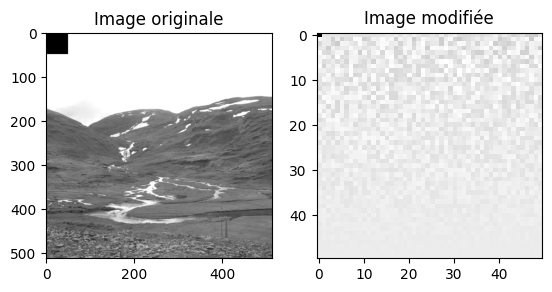

In [19]:
import numpy as np
from scipy.optimize import minimize

from PIL import Image
import matplotlib.pyplot as plt



# Définition des paramètres
M = 10  # Taille de la permutation
d0 = 0.5  # Contrainte de distorsion
target_mean = 0.5  # Moyenne cible pour MaxEnt

# Initialisation de la permutation
initial_permutation = np.ones(M) / M

# Fonction objectif du programme avec contrainte
def maxent_objective(pi):
    return -np.sum(pi * np.log2(pi))

# Contrainte de moyenne pour MaxEnt
def mean_constraint(pi, target_mean):
    return np.mean(pi) - target_mean

# Algorithme de Newton avec contrainte d'égalité
def newton_method_with_equality_constraints(pi):
    # Calcul du gradient et de la hessienne de la fonction objectif
    grad_f = -np.log2(pi) - 1
    hess_f = np.diag(1 / (np.log(2) * pi))

    # Matrice de contrainte pour la contrainte d'égalité Ax = b
    A = np.ones((1, M))
    b = np.array([1.0])

    # Système d'équations linéaires pour obtenir la direction de Newton
    system_matrix = np.block([[hess_f, A.T], [A, np.zeros((1, 1))]])
    rhs = np.concatenate([-grad_f, np.zeros(1)])

    # Résolution du système linéaire
    solution = np.linalg.solve(system_matrix, rhs)

    # Extraction de la direction de Newton à partir de la solution
    newton_direction = solution[:M]

    # Mise à jour de la permutation
    pi = pi + newton_direction

    return pi

# Application de l'algorithme de Newton avec contrainte d'égalité
result_pi = newton_method_with_equality_constraints(initial_permutation)

# Afficher les résultats
print("Permutation optimale:", result_pi)
print("Valeur optimale de la fonction objectif:", maxent_objective(result_pi))

# Fonction pour appliquer MaxEnt à un bloc avec une carte de poids
def apply_maxent_to_block(block, weight_map, target_mean):
    # Normaliser le bloc pour obtenir une distribution de probabilité
    block_distribution = block / np.sum(block)

    # Initialiser la distribution optimale
    initial_distribution = np.ones_like(block_distribution) / len(block_distribution)

    # Contraintes pour MaxEnt
    constraints = [{'type': 'eq', 'fun': mean_constraint, 'args': (target_mean,)}]

    # Appliquer la méthode d'optimisation MaxEnt
    result = minimize(maxent_objective, initial_distribution.flatten(), constraints=constraints)

    # Récupérer la distribution optimale
    optimal_distribution = result.x

    # Appliquer la distribution optimale au bloc avec les poids
    weighted_block = optimal_distribution.reshape(block.shape) * weight_map

    return weighted_block

# Exemple d'application de MaxEnt à un bloc avec une carte de poids
image_path = "C:\\Users\\o\\Desktop\\1.pgm"
image = Image.open(image_path)
image_array = np.array(image)

# Spécifier la taille du bloc
block_size = 50  # Remplacez cette valeur par la taille souhaitée

# Coordonnées du bloc dans l'image
i, j = 0, 0  

# Sélection du bloc
block = image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size]

# Carte de poids (à définir selon vos besoins)
weight_map = np.ones_like(block)


# Appliquer MaxEnt au bloc avec la carte de poids
result_block = apply_maxent_to_block(block, weight_map, target_mean)

# Remplacer le bloc original par le résultat
image_array[i * block_size: (i + 1) * block_size, j * block_size: (j + 1) * block_size] = result_block



# Afficher l'image originale
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Image originale')

plt.subplot(1, 2, 2)
plt.imshow(result_block, cmap='gray')
plt.title('Image modifiée')

plt.show()



In [22]:
import nbformat
from nbconvert import PDFExporter

def ipynb_to_pdf(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as f:
        notebook_content = nbformat.read(f, as_version=4)

    pdf_exporter = PDFExporter()
    pdf_data, resources = pdf_exporter.from_notebook_node(notebook_content)

    with open(output_file, 'wb') as pdf_file:
        pdf_file.write(pdf_data)

if __name__ == "__main__":
    input_notebook = 'C:\\Users\\o\\Desktop\\projet_optimisation.ipynb'  # Remplacez 'example.ipynb' par le nom de votre fichier .ipynb
    output_pdf = 'avancé.pdf'  # Nom du fichier PDF de sortie

    ipynb_to_pdf(input_notebook, output_pdf)